# Support Vector Machines

In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score

from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
from sklearn.svm import SVC 

# Binary
data_default = pd.read_excel("Default.xlsx")

# convert student column to categorical
data_default["default"] = data_default["default"].replace("No",0)
data_default["default"] = data_default["default"].replace("Yes",1)

In [2]:
# split dataset into x and y

y_default = data_default['default']
x_default = data_default.drop(["default","student"],axis =1)



st = StandardScaler()
x_default_std= st.fit_transform(x_default)
# split into training and test

from sklearn.model_selection import train_test_split
train_x_def,test_x_def,train_y_def,test_y_def = train_test_split(x_default_std,y_default,test_size = 0.2,random_state=42)

In [3]:
# Linear Kernel with hard margin
svm = SVC(kernel='linear',C=1.0)
svm.fit(train_x_def,train_y_def)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
prediction_svm = svm.predict(train_x_def) 

In [5]:
confusion_matrix(train_y_def,prediction_svm)

array([[7736,    0],
       [ 264,    0]])

In [6]:
print(classification_report(train_y_def, prediction_svm))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      7736
          1       0.00      0.00      0.00       264

avg / total       0.94      0.97      0.95      8000



/Users/uday/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Discussion**

- At this point the Linear SVM and Logistic Regression have a similar performance because they are producing a similar performance decision boundry.

## Visiualize Decision Boundry

In [7]:
import numpy as np
x_array = np.asarray(train_x_def)
y_array = np.asarray(train_y_def)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)

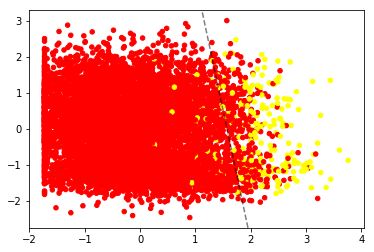

In [8]:
plt.scatter(x_array[:, 0], x_array[:, 1], c=y_array, s=20, cmap='autumn')
plot_svc_decision_function(svm);

## Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params_dict = {"C": np.logspace(-1, 3, 20), "gamma": np.linspace(0.0001, 10, 20)}

svm_rbf = SVC(kernel = 'rbf')
# Fit the grid search
search_rbf = GridSearchCV(estimator=svm_rbf, param_grid=params_dict,cv=3)
search_rbf.fit(train_x_def,train_y_def)

In [ ]:
print("Best parameter values:", search_rbf.best_params_)
print("CV Score with best parameter values:", search_rbf.best_score_)

In [ ]:
plt.scatter(x_array[:, 0], x_array[:, 1], c=y_array, s=20, cmap='autumn')
plot_svc_decision_function(svm_rbf);

## Multiclass and Tuning SVM's

In [53]:
# Multilabel
data_oil = pd.read_csv("olive_oil.csv")
data_oil = data_oil.drop(["Unnamed: 0","area"],axis = 1)
y_oil = data_oil['region']
x_oil = data_oil.drop(["region"],axis =1)

# standardize 

x_oil_std= st.fit_transform(x_oil)

# split into training and test
from sklearn.model_selection import train_test_split
train_x_oil,test_x_oil,train_y_oil,test_y_oil = train_test_split(x_oil_std,y_oil,test_size = 0.2)

In [54]:
# OVR
%time svm.fit(train_x_oil,train_y_oil)


CPU times: user 2.55 ms, sys: 1.29 ms, total: 3.84 ms
Wall time: 4.45 ms


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
predictions_oil = svm.predict(train_x_oil)

confusion_matrix(train_y_oil,predictions_oil)

array([[262,   0,   0],
       [  0,  82,   0],
       [  0,   0, 113]])

In [56]:
#OVO
svm_ovo = SVC(kernel='linear',C=0.0001,decision_function_shape='ovo')
%time svm_ovo.fit(train_x_oil,train_y_oil)


CPU times: user 3.61 ms, sys: 976 µs, total: 4.59 ms
Wall time: 3.85 ms


SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [57]:
predictions_ovo = svm_ovo.predict(train_x_oil)
confusion_matrix(train_y_oil,predictions_ovo)

array([[262,   0,   0],
       [ 82,   0,   0],
       [113,   0,   0]])

In [64]:
from sklearn.metrics import hinge_loss

pred_decision = svm.decision_function(train_x_oil)

svm_loss = hinge_loss(pred_decision = pred_decision, y_true = train_y_oil )
print(svm_loss)

6.10625890505024e-05


In [58]:
# Hyperparameter tuning for C and Gamma
from sklearn.model_selection import GridSearchCV

params_dict = {"C": np.logspace(-1, 3, 50), "gamma": np.linspace(0.0001, 10, 50)}


# Fit the grid search
search = GridSearchCV(estimator=svm, param_grid=params_dict,cv=3)
search.fit(train_x_oil,train_y_oil)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-01, 1.20679e-01, 1.45635e-01, 1.75751e-01, 2.12095e-01,
       2.55955e-01, 3.08884e-01, 3.72759e-01, 4.49843e-01, 5.42868e-01,
       6.55129e-01, 7.90604e-01, 9.54095e-01, 1.15140e+00, 1.38950e+00,
       1.67683e+00, 2.02359e+00, 2.44205e+00, 2.94705e+00, 3.55648e... 8.77552e+00, 8.97960e+00,
       9.18368e+00, 9.38776e+00, 9.59184e+00, 9.79592e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
print("Best parameter values:", search.best_params_)
print("CV Score with best parameter values:", search.best_score_)

Best parameter values: {'C': 0.44984326689694454, 'gamma': 0.0001}
CV Score with best parameter values: 1.0


In [70]:
best_svm= SVC(kernel='rbf',C=0.4498,gamma= 0.0001)
best_svm.fit(train_x_oil,train_y_oil)

predictions_best = best_svm.predict(train_x_oil)
confusion_matrix(train_y_oil,predictions_best)




array([[262,   0,   0],
       [ 82,   0,   0],
       [113,   0,   0]])

In [68]:
pred_decision_best = best_svm.decision_function(train_x_oil)
svm_loss_best = hinge_loss(pred_decision = pred_decision_best, y_true = train_y_oil )
print(svm_loss_best)

1.294802371238875


## Custom Kernels

In [ ]:


def NN_kernel(X, Y=None, gamma=None, coef0=1):
    X, Y = check_pairwise_arrays(X, Y)
    if gamma is None:
        gamma = 1.0 / X.shape[1]

    K = safe_sparse_dot(X, Y.T, dense_output=True)
    K *= gamma
    K += coef0
    np.tanh(K, K)   # compute tanh in-place
    return K


In [ ]:
custom_kernel= svm.SVC(kernel=my_kernel)